# 19AI704 Applied Predictive Analytics 

### Evaluation Lab 4 : Logistic Regression


#### Athul Mathew CB.EN.P2AID20016

User Database (pn123.csv) : The dataset contains information of users from a company’s database. It contains information about 
UserID, Gender, Age, EstimatedSalary, and Purchase. We are usingthis dataset for predicting that a user will purchase the company’s newly launched product or not. 

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/pn123.csv"
 
df = pd.read_csv(url)

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 2000
Shape of the data frame is (400, 5)
No of Rows =  400
No of Columns =  5


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Check for missing values

In [4]:
import missingno as msno
# ! pip install missingno

miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


### EDA

<AxesSubplot:xlabel='Purchased', ylabel='count'>

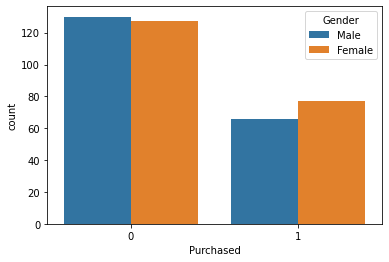

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Purchased',hue='Gender',data=df)

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (400, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

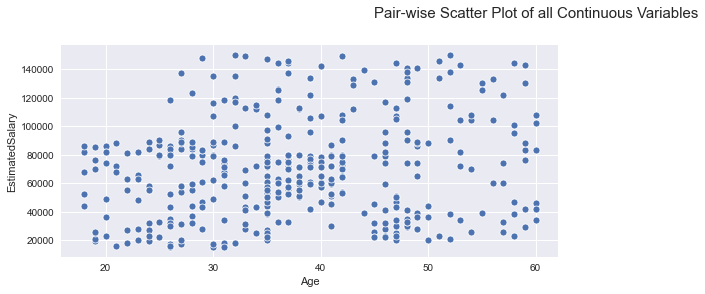

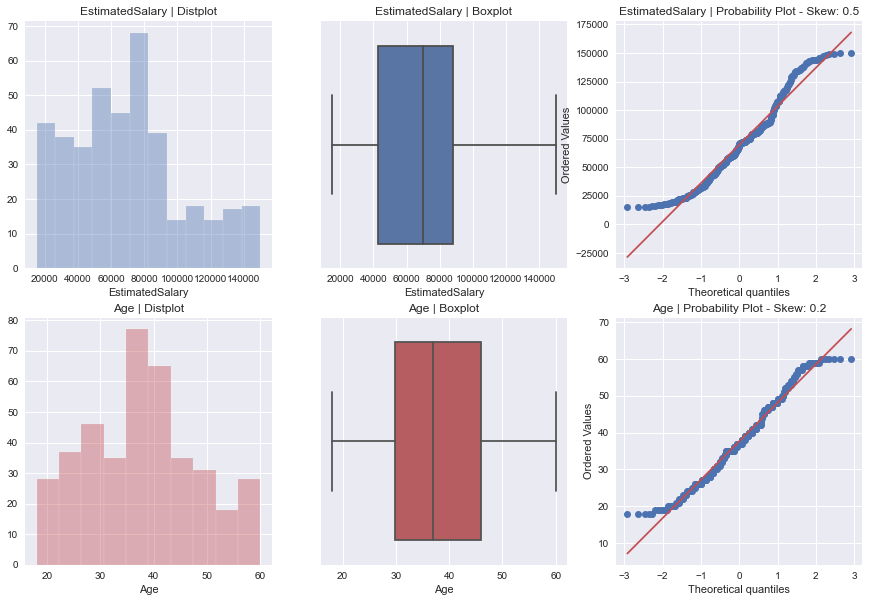

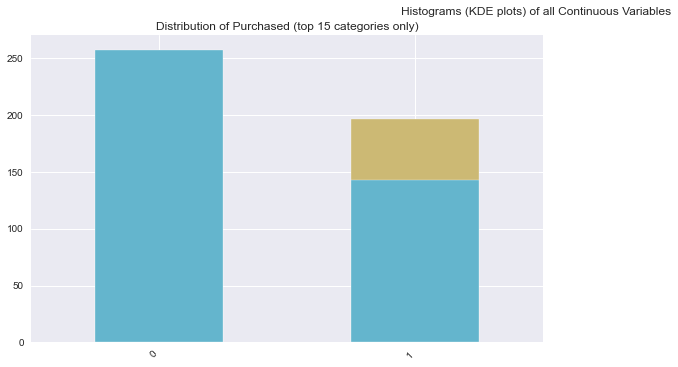

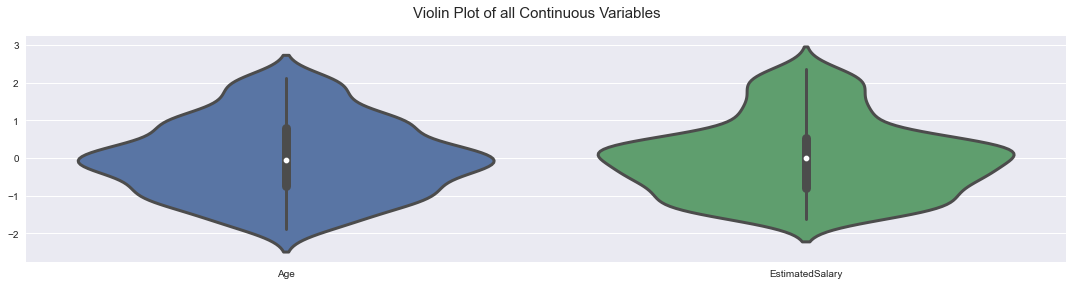

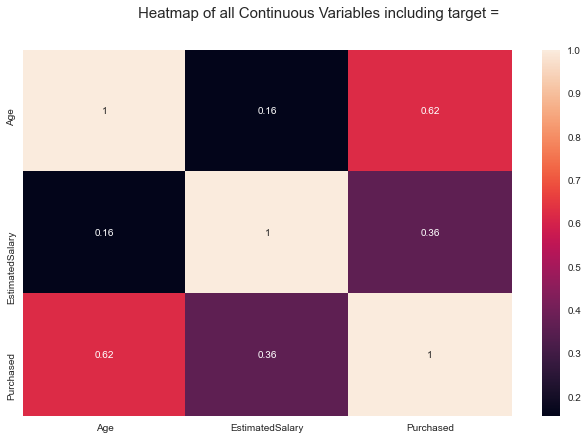

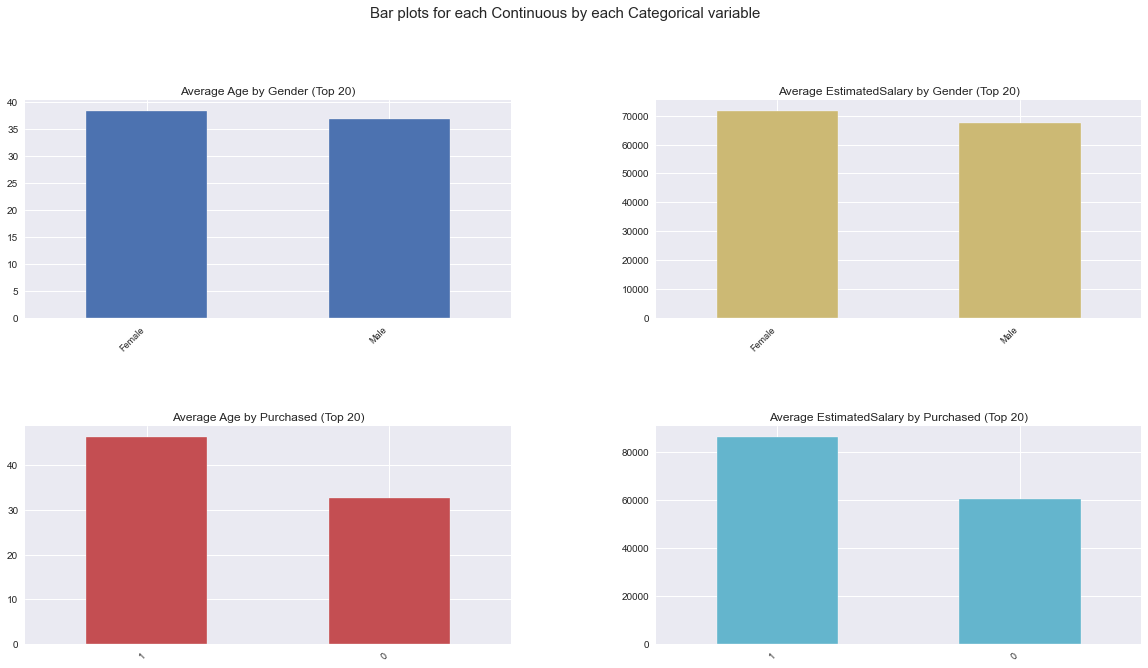

Time to run AutoViz (in seconds) = 6.103

 ###################### VISUALIZATION Completed ########################


In [6]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

                                             |          | [  0%]   00:00 -> (? left)


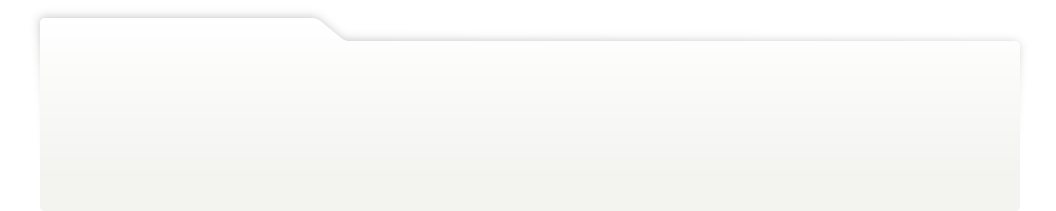
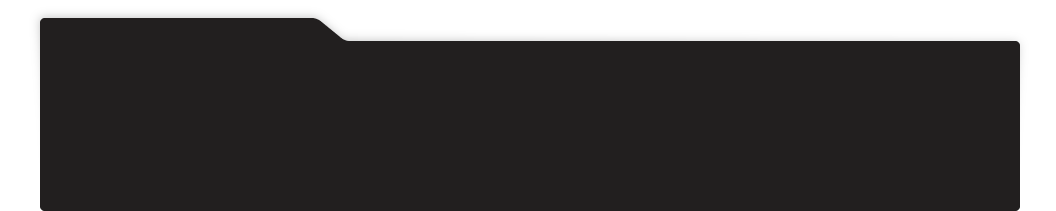
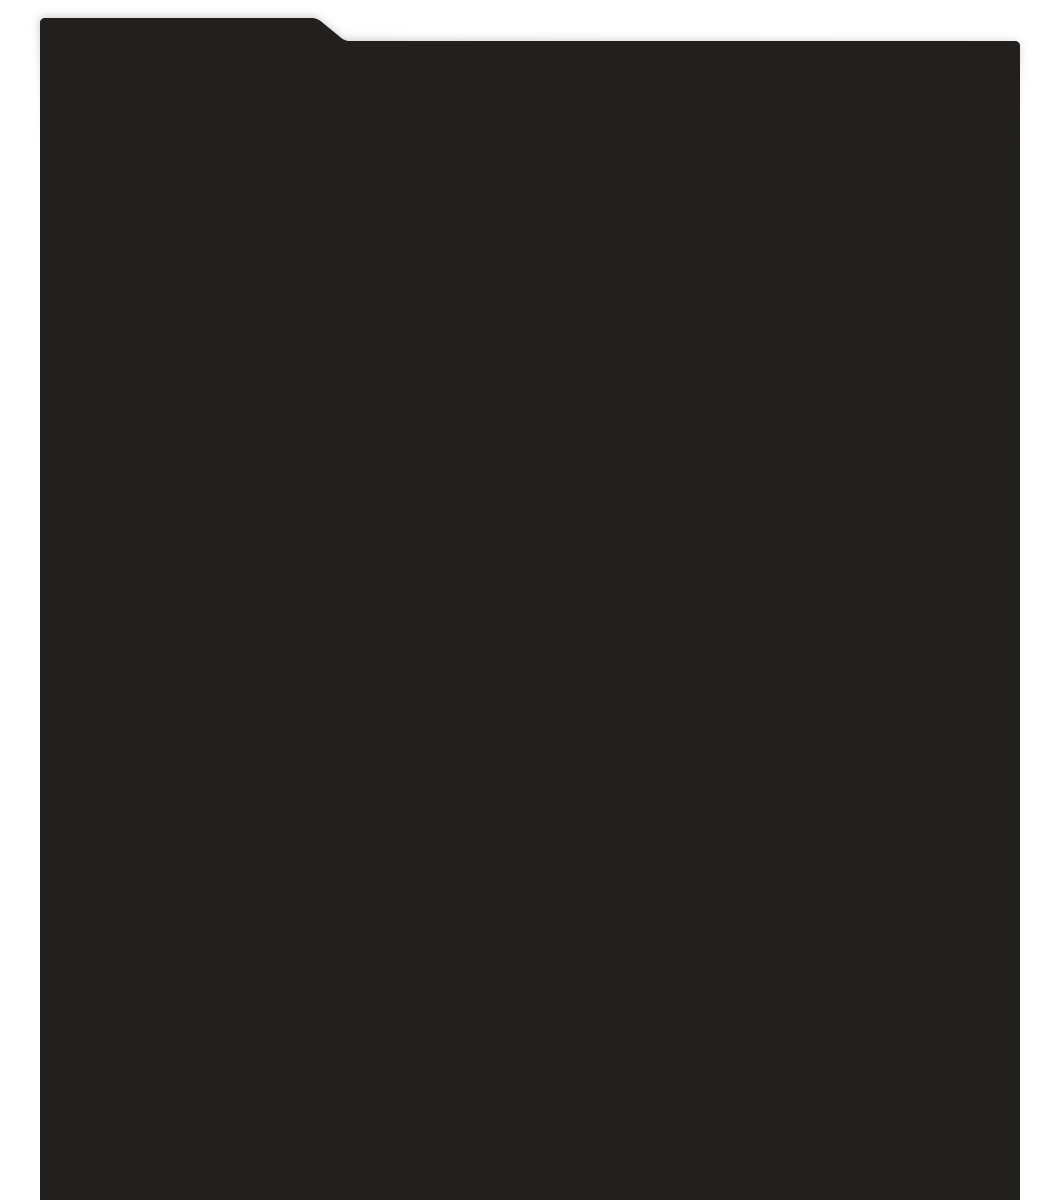
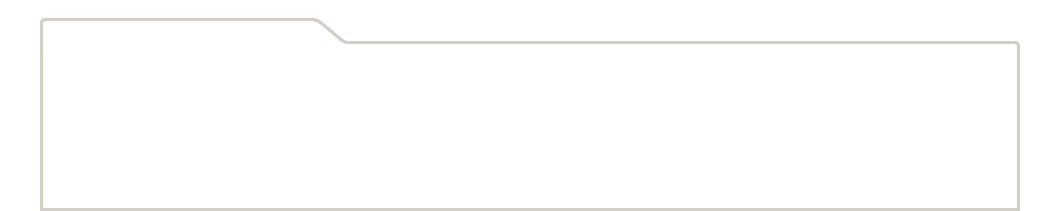
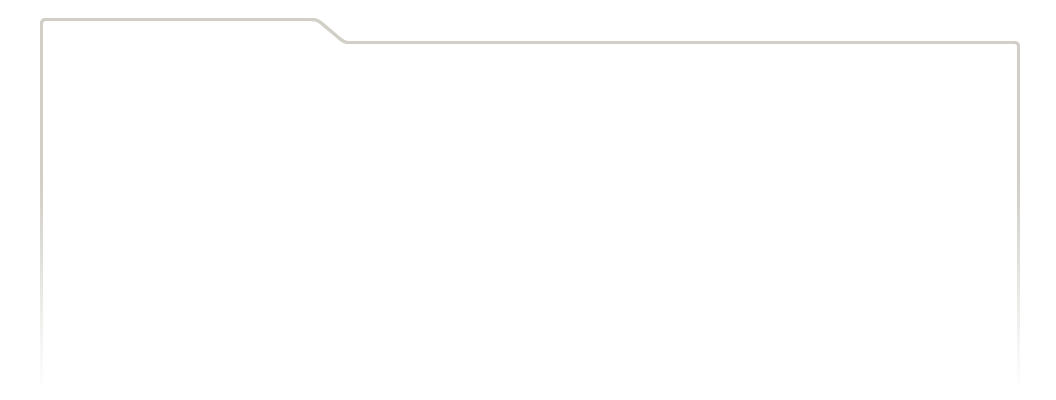
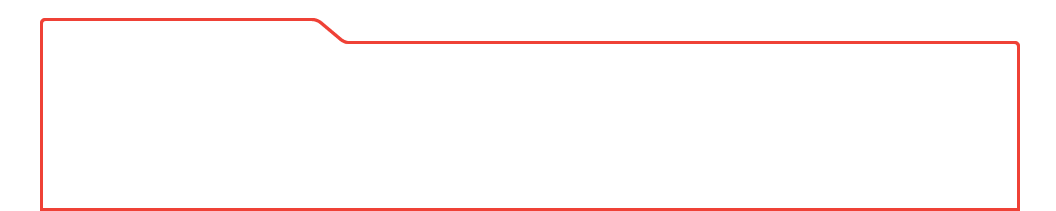
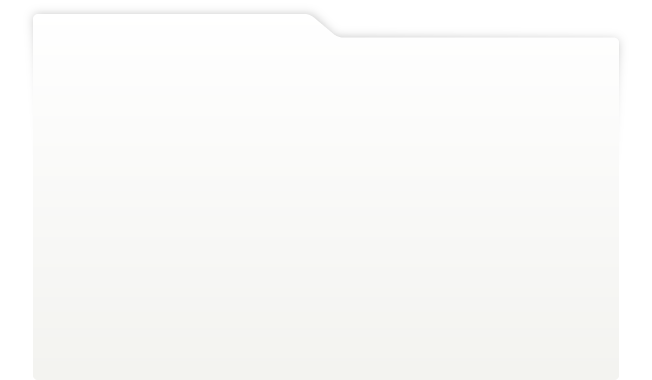
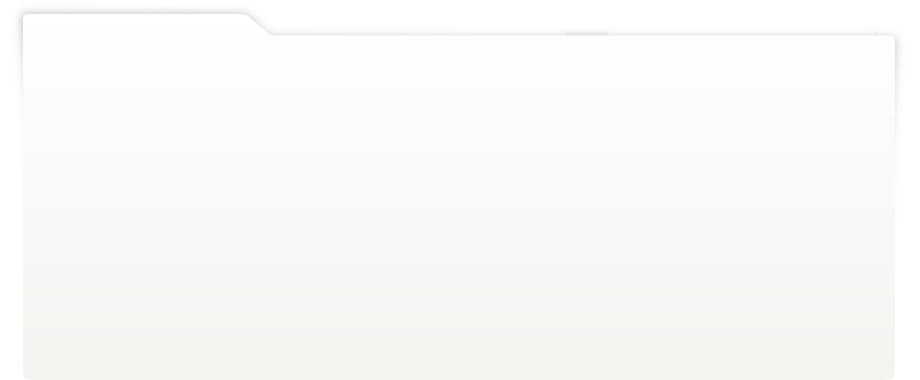
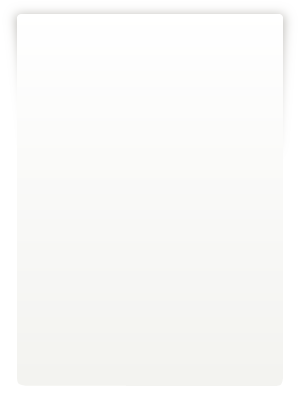
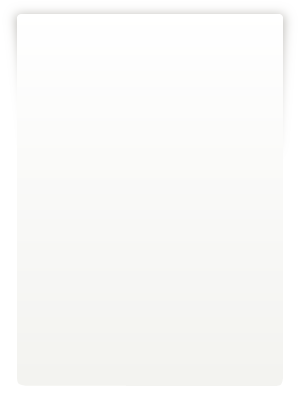
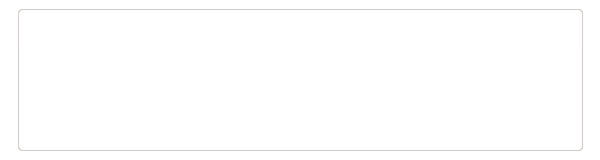
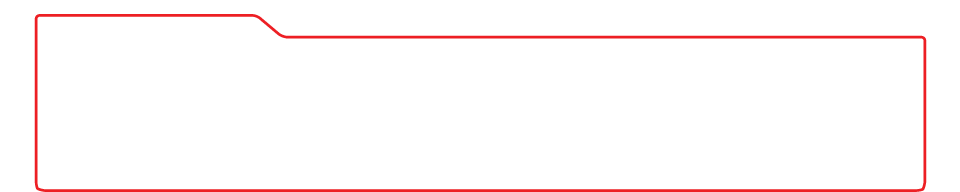
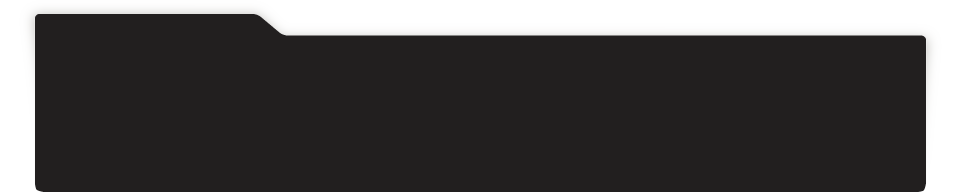
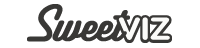
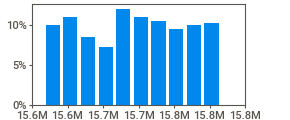
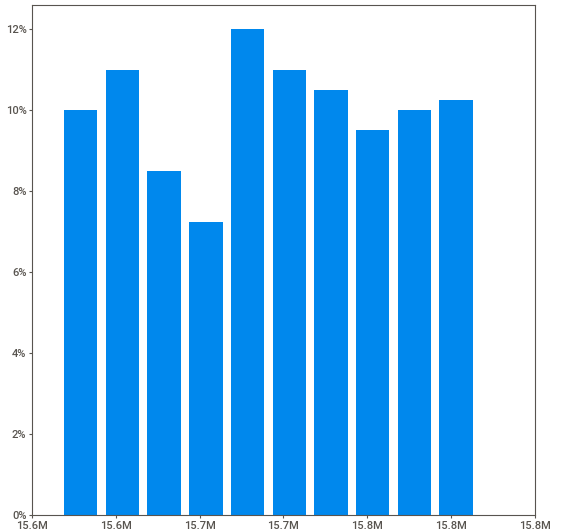
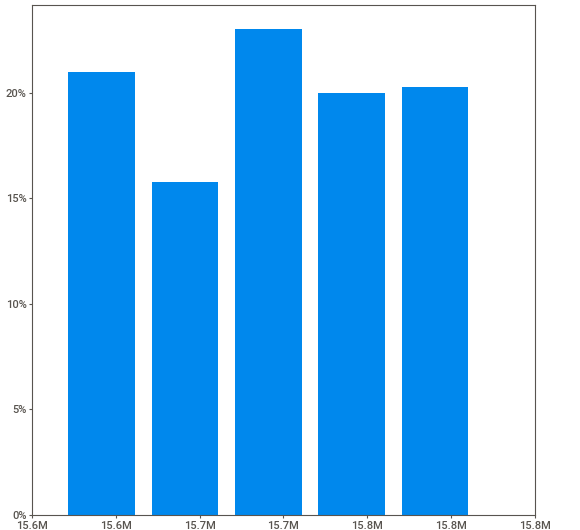
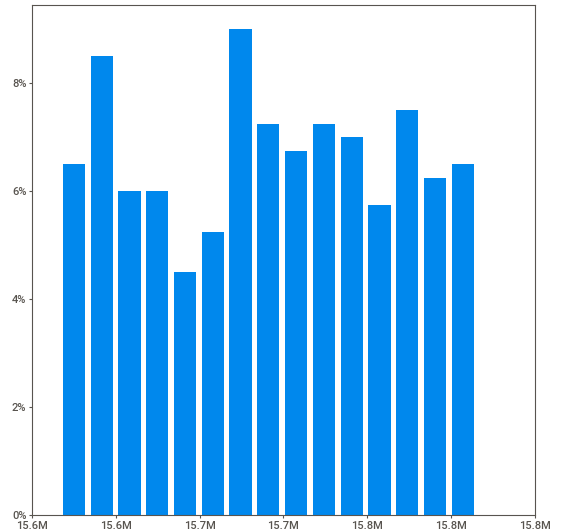
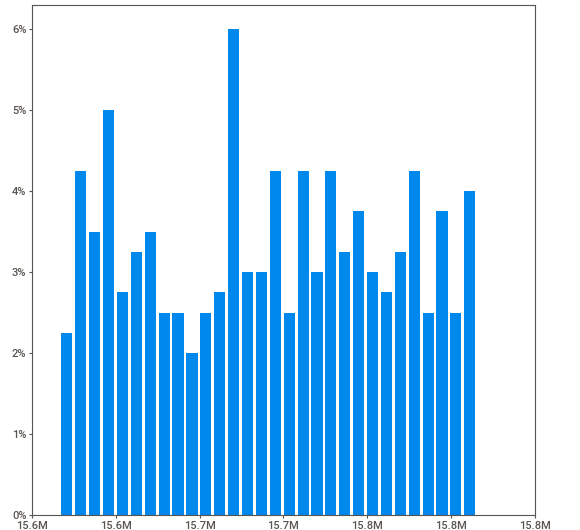
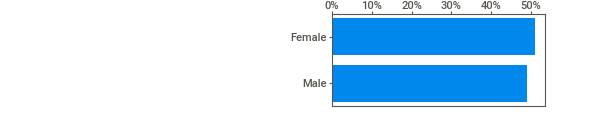
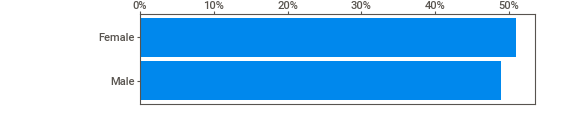
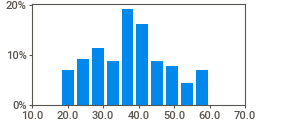
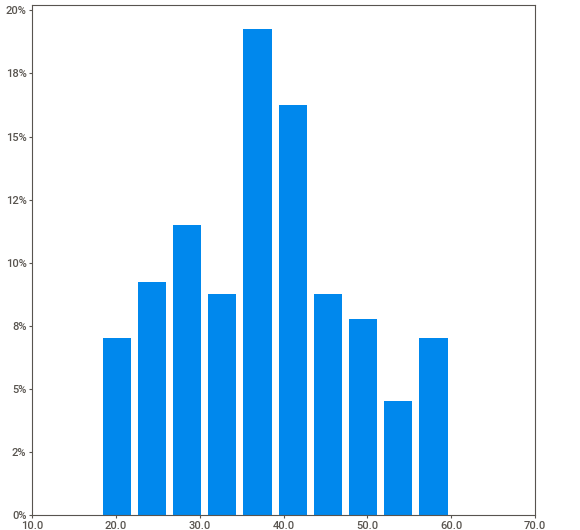
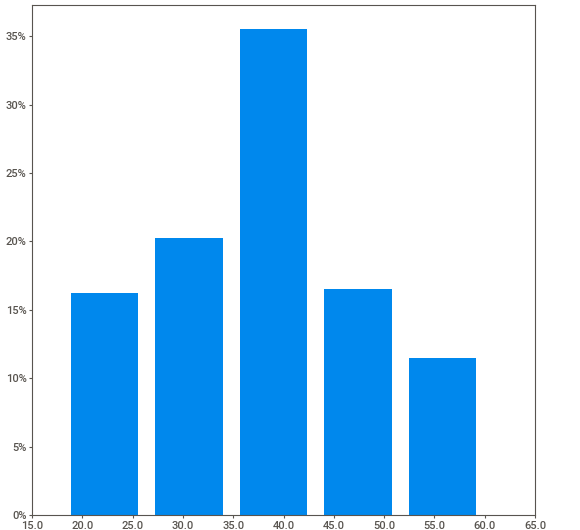
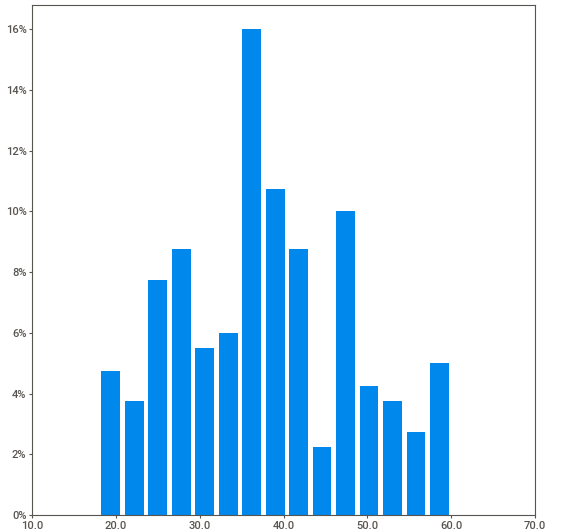
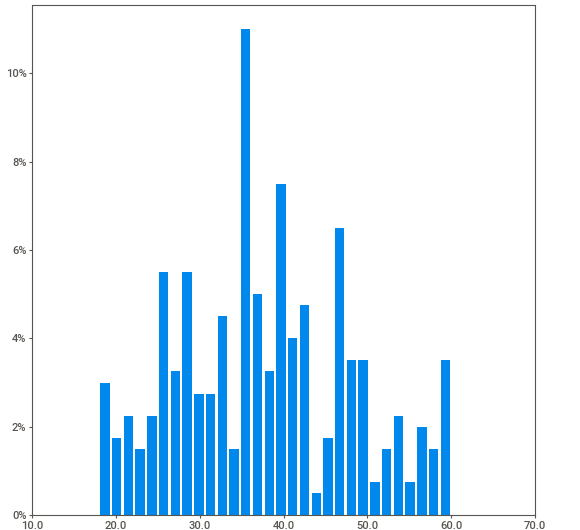
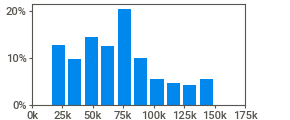
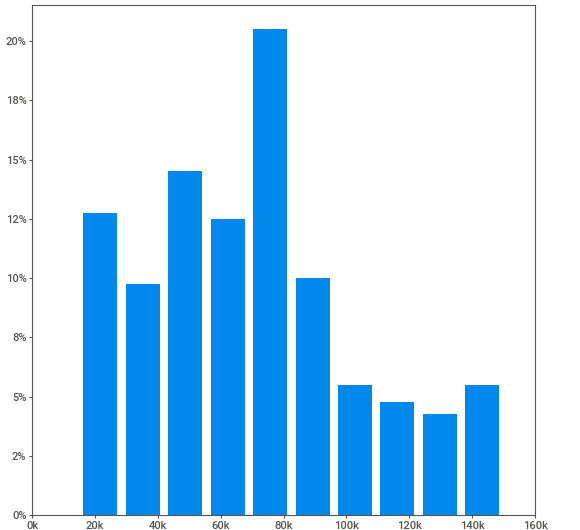
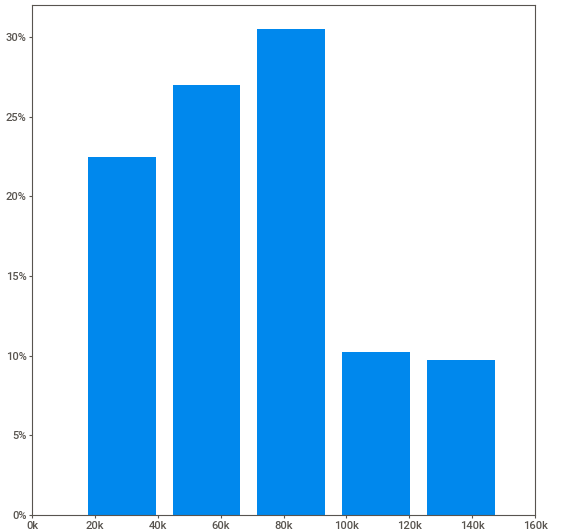
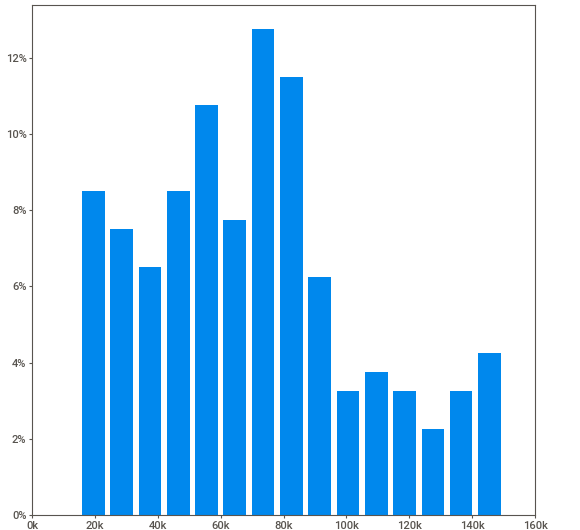
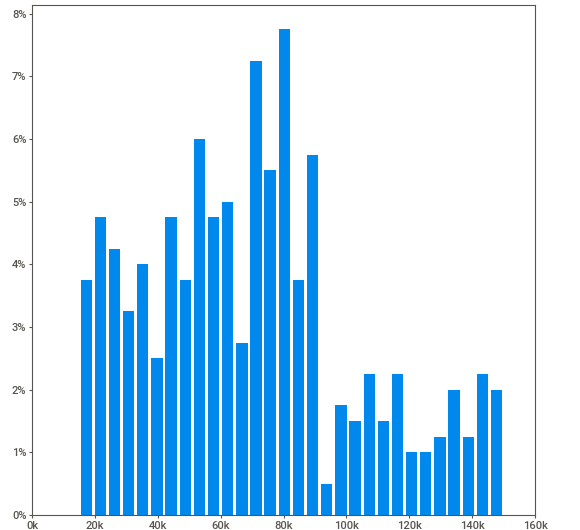
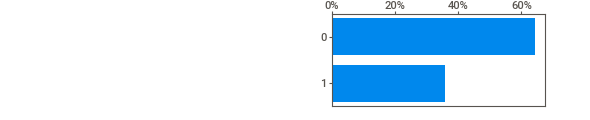
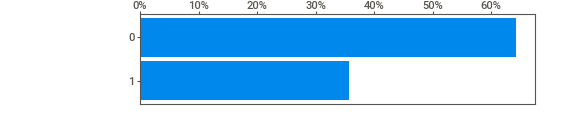
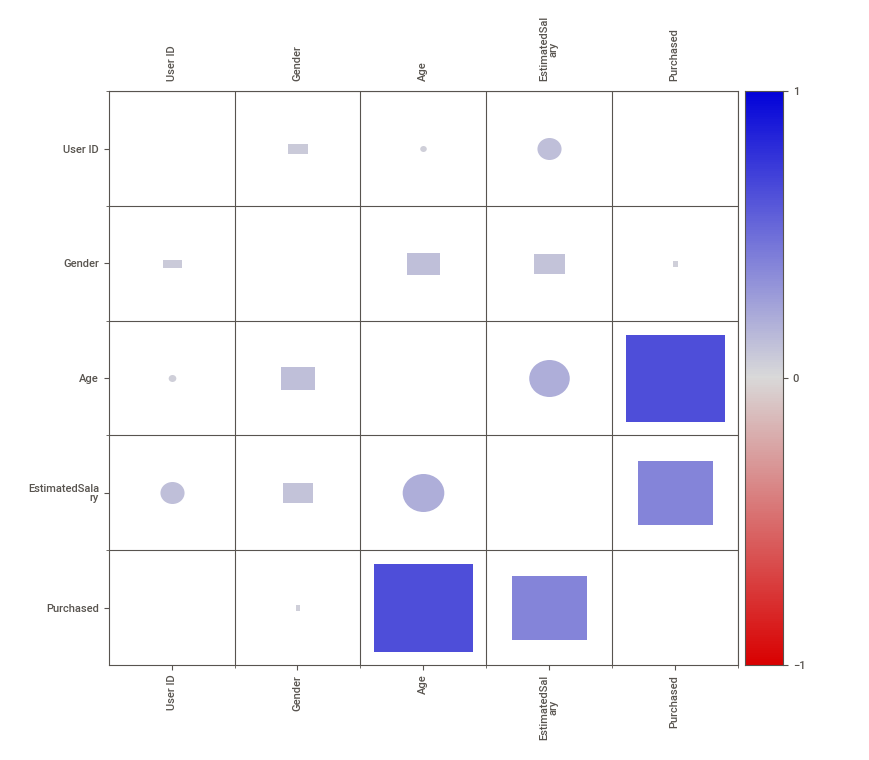
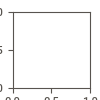

In [7]:
# ! pip install sweetviz

import sweetviz as sv

report = sv.analyze(df)

# report.show_html('Purchase Trend.html')
report.show_notebook(w=None, h=None, scale=None,layout='widescreen',filepath=None)

## Preprocessing

Now, to predict whether a user will purchase the product or not, 
one needs to find out the relationship between Age and Estimated 
Salary. Here User ID and Gender are not important factors for 
finding out this. So we can drop these two features.

In [8]:
df = df.drop(["User ID"], axis=1)
df = df.drop(["Gender"], axis=1)
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Correlation Matrix

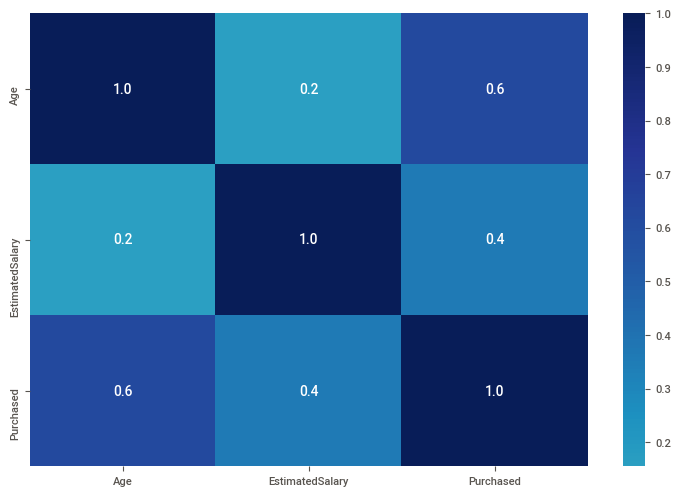

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap = 'YlGnBu', center=0, ax=ax)
plt.show()

### Feature Scaling

Perform feature scaling here because Age and Estimated Salary 
values lie in different ranges. If we don’t scale the features theEstimated Salary feature will dominate Age feature when the model finds the nearest neighbor to a data point in data space. Scale inthe range -1 to 1, such that, each feature will contribute equallyin decision making i.e. in finalizing the hypothesis.

In [10]:
from sklearn import preprocessing

cols_to_scale = ['Age', "EstimatedSalary"]

# scaler = preprocessing.MaxAbsScaler()
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
# scaler = preprocessing.StandardScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

df = scaleColumns(df, cols_to_scale)

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,-0.064048,-0.189000,0.357500
std,0.499185,0.505140,0.479864
min,-1.000000,-1.000000,0.000000
25%,-0.440476,-0.585185,0.000000
50%,-0.095238,-0.185185,0.000000
75%,0.333333,0.081481,1.000000
max,1.000000,1.000000,1.000000


### Feature Selection

In [11]:
Y = df['Purchased']
X = df[['Age', 'EstimatedSalary']]

X.head(5)

,Age,EstimatedSalary
0,-0.952381,-0.940741
1,-0.190476,-0.925926
2,-0.619048,-0.585185
3,-0.571429,-0.377778
4,-0.952381,-0.096296


In [12]:
Y.unique()

array([0, 1], dtype=int64)

### Train Test Split

Split the dataset to train and test. 75% of data is used for train-ing the model and 25% of it is used to test the performance of the model.

NB: Use sklearn.model_selection and import train_test_split 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.25, random_state=52)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (300, 2)
Shape of X_test: (100, 2)
Shape of Y_train: (300,)
Shape of Y_test: (100,)


### Logistic Regression

Finally,train a Logistic Regression model, and analyse performancemeasures, accuracy and confusion matrix.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg

LogisticRegression()

In [15]:
Y_pred = log_reg.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,Y_pred)
acc

0.85

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        64
           1       0.89      0.67      0.76        36

    accuracy                           0.85       100
   macro avg       0.86      0.81      0.83       100
weighted avg       0.85      0.85      0.84       100



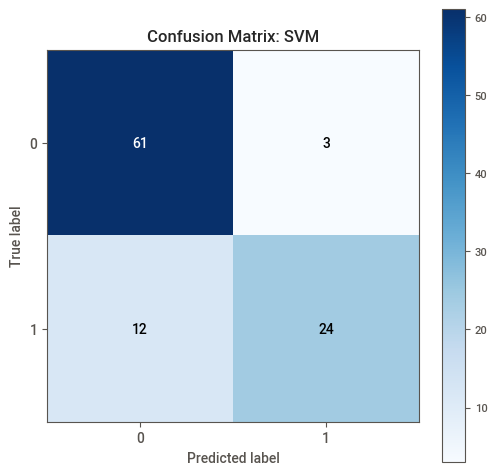

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=False,
                                    cmap='Blues')
plt.show()

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision Score - Macro", precision_score(Y_test, Y_pred, average='macro'))
print("Precision Score - Weighted", precision_score(Y_test, Y_pred, average='weighted'))

print("Recall Score - Macro", recall_score(Y_test, Y_pred, average='macro'))
print("Recall Score - Weighted", recall_score(Y_test, Y_pred, average='weighted'))

print("F1 Score - Macro", f1_score(Y_test, Y_pred, average='macro'))
print("F1 Score - Weighted", f1_score(Y_test, Y_pred, average='weighted'))

Precision Score - Macro 0.8622526636225266
Precision Score - Weighted 0.8547945205479452
Recall Score - Macro 0.8098958333333333
Recall Score - Weighted 0.85
F1 Score - Macro 0.8262078554049357
F1 Score - Weighted 0.8442127215849844


Draw a graph to visualize your results–and show that your model performance is satisfactory.

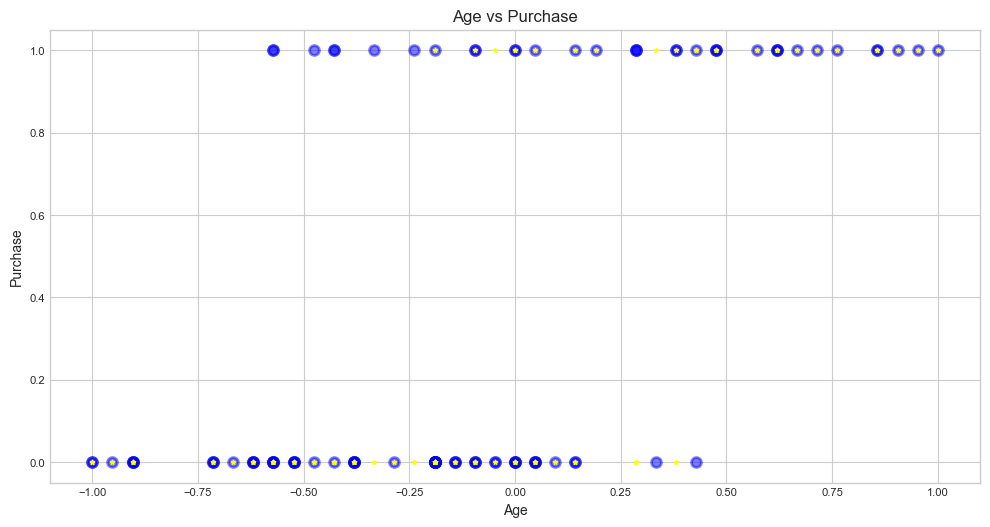

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.style.use('seaborn-whitegrid')

plt.title("Age vs Purchase")

test = plt.scatter(X_test.Age, Y_test, 
                  c = "blue", linewidths = 2, edgecolor ="blue", 
                  s = 50, alpha = 0.5)

pred = plt.scatter(X_test.Age, Y_pred, 
                  c = "yellow", marker="*" )

plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

- Blue dots - Actual Test output.
- Yellow dots - Predicted output from model.
- Yellow dots with blue border - Test and predicted value is the same.

Model preditcs almost all of the data correctly(Accuracy : 85% ). 
The yellow stars denote the predicted value and Blue dots represent the test data.

#### ROC Curve

<Figure size 600x400 with 0 Axes>

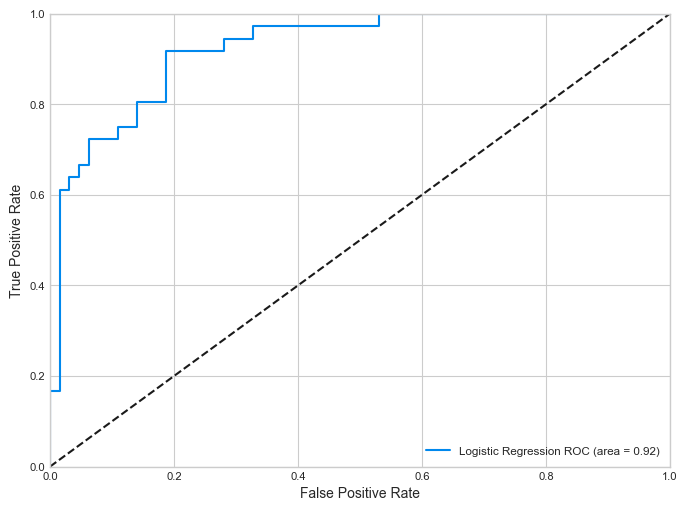

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.clf()
plt.figure(figsize=(8,6))


log_reg.probability = True
probas = log_reg.fit(X_train,Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ("Logistic Regression", roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

Area Under the curve is 0.92, which is very much greater than 0.5. 
This implies that the model classifies individuals with high accuracy.

#### Precision-Recall curve

- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.

Text(0.5, 1.0, 'Precision-Recall curve')

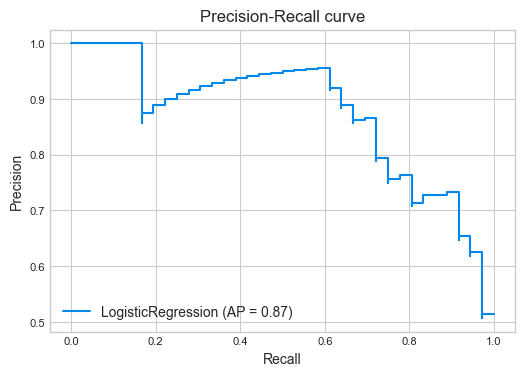

In [22]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(log_reg, X_test, Y_test)
disp.ax_.set_title("Precision-Recall curve")

At thresholds with low recall, the precision is high 
and at high recall, the precision is low.

Here the Average Precision Score (AP) is 0.87 which indicates a good model.